In [1]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('D:/Data_ Science/Delivery_Time.csv')
data.head()

,Del_Time,Sort_Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Del_Time   21 non-null     float64
 1   Sort_Time  21 non-null     float64
dtypes: float64(2)
memory usage: 944.0 bytes


In [4]:
data.corr()
# As the correlation value is >0.8 the varaibles are strongly correeated 

,Del_Time,Sort_Time
Del_Time,1.000000,0.825997
Sort_Time,0.825997,1.000000


C:\Users\jashwini_d\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Del_Time', ylabel='Density'>

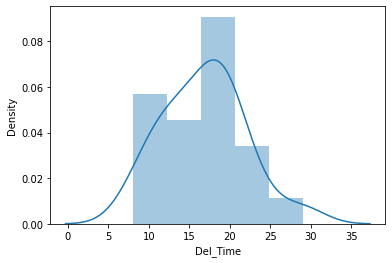

In [5]:
import seaborn as sns
sns.distplot(data['Del_Time'])

C:\Users\jashwini_d\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sort_Time', ylabel='Density'>

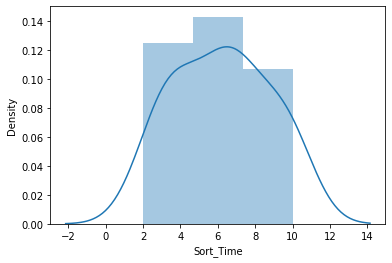

In [6]:
import seaborn as sns
sns.distplot(data['Sort_Time'])

In [7]:
import statsmodels.formula.api as smf                 
model = smf.ols("Del_Time~Sort_Time",data=data).fit()  

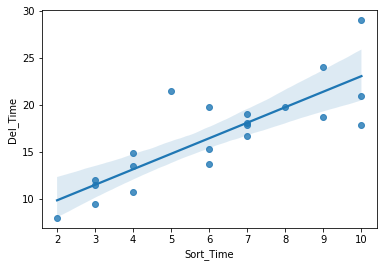

In [8]:
sns.regplot(x="Sort_Time", y="Del_Time", data=data);

In [9]:
#Coefficients
model.params

Intercept    6.582734
Sort_Time    1.649020
dtype: float64

In [10]:
model.summary()
# as the R- Squared varibles value is less that 0.8,i.e 0.682 we can say that the model is weak

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Del_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        13:15:03   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sort_Time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)   
#As p Value is less tha 0.05 the modele is not that greta
# “\n” indicates that the line ends here and the remaining characters would be displayed in a new line.

Intercept    3.823349
Sort_Time    6.387447
dtype: float64 
 Intercept    0.001147
Sort_Time    0.000004
dtype: float64


In [12]:
(model.rsquared,model.rsquared_adj)
# as the r squared value and r squared adj values are 0.68 and 0.66, by using this model we can predict only 66% to 68 % of input variables

(0.6822714748417231, 0.6655489208860244)

# Predict for new data points

In [13]:
#Predict for 12 and 15 Sort time
newdata=pd.Series([12,15])

In [14]:
data_pred=pd.DataFrame(newdata,columns=['Sort_Time'])

In [15]:
model.predict(data_pred)

0    26.370973
1    31.318032
dtype: float64

In [16]:
preds = model.predict(data.Sort_Time)

In [17]:
import numpy as np
np.sqrt(np.mean((data.Sort_Time-preds)**2))

10.722052392104555